Abalone data의 Ring 값을 DT, SVM, LR 알고리즘으로 분류해보자.

In [150]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split

In [152]:
df = pd.read_csv('https://raw.githubusercontent.com/MyungKyuYi/AI-class/refs/heads/main/abalone.csv')
df.head()

,id,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
0,0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [154]:
'''
    id: 아이디
    Sex: 성별
    Length: 길이
    Diameter: 직경
    Height: 높이
    Whole_weight: 전체 무게
    Shucked_weight: 껍질 벗긴 무게
    Viscera_weight: 내장 무게
    Shell_weight: 껍질 무게
    Rings: 고리 (혹은 나이)
'''

'\n    id: 아이디\n    Sex: 성별\n    Length: 길이\n    Diameter: 직경\n    Height: 높이\n    Whole_weight: 전체 무게\n    Shucked_weight: 껍질 벗긴 무게\n    Viscera_weight: 내장 무게\n    Shell_weight: 껍질 무게\n    Rings: 고리 (혹은 나이)\n'

In [156]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              4177 non-null   int64  
 1   Sex             4177 non-null   object 
 2   Length          4177 non-null   float64
 3   Diameter        4177 non-null   float64
 4   Height          4177 non-null   float64
 5   Whole_weight    4177 non-null   float64
 6   Shucked_weight  4177 non-null   float64
 7   Viscera_weight  4177 non-null   float64
 8   Shell_weight    4177 non-null   float64
 9   Rings           4177 non-null   int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 326.5+ KB


In [158]:
# Null Check
df.isna().sum()

id                0
Sex               0
Length            0
Diameter          0
Height            0
Whole_weight      0
Shucked_weight    0
Viscera_weight    0
Shell_weight      0
Rings             0
dtype: int64

In [160]:
# encode categoircal data
# from sklearn.preprocessing import 
df['Sex'].unique()

array(['M', 'F', 'I'], dtype=object)

In [162]:
# One-Hot Encode Sex 
df = pd.get_dummies(df, columns = ['Sex'])

In [164]:
df.describe()

,id,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,2088.000000,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,1205.940366,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.000000,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,1044.000000,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,2088.000000,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,3132.000000,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,4176.000000,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


Text(0.5, 1.0, 'Abalone')

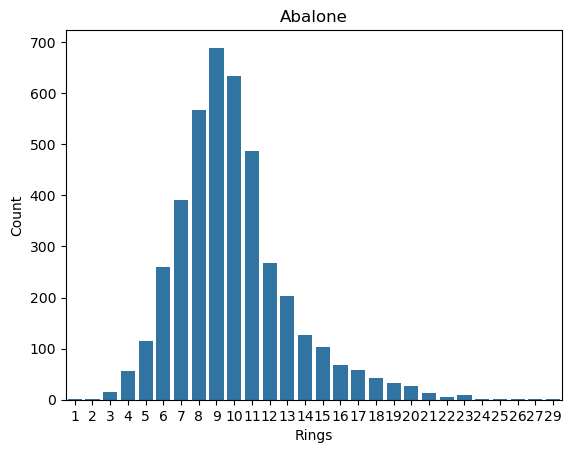

In [166]:
# label count plot
import seaborn as sns

sns.countplot(data = df, x="Rings")
plt.xlabel("Rings")
plt.ylabel("Count")
plt.title("Abalone")

Rings column은 1부터 29까지의 값을 갖으며, skewed 분포를 보임을 확인할 수 있다.  

🤔왜 label을 0부터 시작하도록 encoding 해줬더라...  
[ GPT ]
1. 대부분의 분률 모델은 target 변수가 0부터 시작하는 것을 기대한다.
0부터 시작하지 않거나, 중간에 값이 빠져 있다면, 이를 처리하는데 혼란이 생길 수있다.
1. 손실함수에서 클래스 간 거리가 불균형하게 해석될 수 있다.

🔫Trouble Shooting
  label encoding 했을 때 train_set에 sample이 1개 남는 문제가 발생한다. 위 그래프에서 볼 수 있듯 1,2,24 ~ 29의 데이터는 현저히 적다. 때문에 1~4 : young, 5 ~ 9 : junior, 10 ~ 14 : adult, 15 ~ 19 : senior, 20 ~ 29 : elderly로 분류하도록 하자.

Preprocessing
- Label Target variable
- Z-score Scaling numerical variable

In [170]:
def label_age_group(value):
    if 1 <= value <= 4:
        return 'young'
    elif 5 <= value <= 9:
        return 'junior'
    elif 10 <= value <= 14:
        return 'adult'
    elif 15 <= value <= 19:
        return 'senior'
    elif 20 <= value <= 29:
        return 'elderly'
    else:
        return 'unknown'

In [172]:
df['Rings'] = df['Rings'].apply(label_age_group)
df.head()

,id,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings,Sex_F,Sex_I,Sex_M
0,0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,senior,False,False,True
1,1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,junior,False,False,True
2,2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,junior,True,False,False
3,3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,adult,False,False,True
4,4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,junior,False,True,False


In [174]:
df['Rings'].unique()

array(['senior', 'junior', 'adult', 'elderly', 'young'], dtype=object)

Text(0.5, 1.0, 'Abalone')

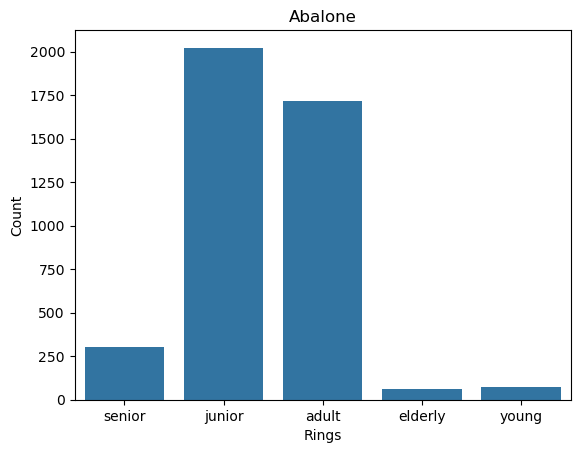

In [176]:
# label count plot
import seaborn as sns

sns.countplot(data = df, x="Rings")
plt.xlabel("Rings")
plt.ylabel("Count")
plt.title("Abalone")
plt.show()

In [199]:
X = df.drop(['id', 'Rings'], axis=1)
y = df.iloc[:, -4].values

In [200]:
X

,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Sex_F,Sex_I,Sex_M
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,False,False,True
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,False,False,True
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,True,False,False
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,False,False,True
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,False,True,False
...,...,...,...,...,...,...,...,...,...,...
4172,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,True,False,False
4173,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,False,False,True
4174,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,False,False,True
4175,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,True,False,False


In [186]:
y

array(['senior', 'junior', 'junior', ..., 'junior', 'adult', 'adult'],
      dtype=object)

In [188]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=0
)

In [190]:
# Standard Scaler
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()

X_train[:, :-4] = ss.fit_transform(X_train[:, :-4])
X_test[:, :-4] = ss.transform(X_test[:, :-4])

In [192]:
X_test

array([[0.8430541140138955, 0.7810086245349201, 1.2984123798559875, ...,
        True, False, False],
       [-1.2301721920707098, -1.2762446569568744, -0.9972958405238452,
        ..., False, True, False],
       [0.09669264382343783, 0.42977025940217495, -0.1045204214872435,
        ..., False, True, False],
       ...,
       [0.5528024311620505, 0.6304778966208863, 0.4056369608193858, ...,
        False, False, True],
       [-0.1935590390284072, -0.021821924339926194, 0.4056369608193858,
        ..., False, False, True],
       [0.22108622218851426, 0.02835498496475122, -0.23205976706390097,
        ..., False, False, True]], dtype=object)

In [194]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

models = {
    'DT(entropy)': DecisionTreeClassifier(criterion='entropy'),
    'DT(gini)': DecisionTreeClassifier(criterion='gini'),
    'LR' : LogisticRegression(),
    'SVM' : SVC(kernel='linear')
}

parameters = {
    'DT(entropy)': {
        'max_depth': [None, 10, 20, 30],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4]
    },
    'DT(gini)': {
        'max_depth': [None, 10, 20, 30],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4]
    },
    'LR': {
        'C': [0.01, 0.1, 1, 10],
        'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
    },
    'SVM': {
        'C': [0.25, 0.5, 0.75, 1],
        'kernel': ['linear', 'rbf'],
        'gamma': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
    }
}

In [196]:
from sklearn.model_selection import GridSearchCV

cv_values=[5, 10, 15]

# Scaler, hyperparameter, various k values
def perform_grid_search(X_train, y_train, models, parameters, cv_values):
    for key in models.keys():
        print(f'[[  {key}  ]]================================================')
        
        for k in cv_values:
            print(f'CV={k}---------------------------------------------------')
            grid_search = GridSearchCV(estimator = models[key],
                                           param_grid = parameters[key],
                                           scoring = 'accuracy',
                                           cv = k, # 여러 k값을 사용할 것
                                           n_jobs = -1)
                
            grid_search.fit(X_train, y_train)
            best_score = grid_search.best_score_
            best_parameters = grid_search.best_params_
            print(f"Best score: ", best_score)
            print("Best Parameters:", best_parameters)
            print()    
        
        print('==================================================')

In [198]:
perform_grid_search(X_train, y_train, models, parameters, cv_values)

[[  DT(entropy)  ]]================================================
CV=5---------------------------------------------------
Best score:  0.645315646733439
Best Parameters: {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 5}

CV=10---------------------------------------------------
Best score:  0.6504093305925462
Best Parameters: {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 2}

CV=15---------------------------------------------------
Best score:  0.6545954025774653
Best Parameters: {'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 10}

[[  DT(gini)  ]]================================================
CV=5---------------------------------------------------
Best score:  0.6611897281669844
Best Parameters: {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 10}

CV=10---------------------------------------------------
Best score:  0.6596925551881311
Best Parameters: {'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 2}

CV=15---

C:\Users\user\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Best score:  0.6973980290539996
Best Parameters: {'C': 10, 'solver': 'lbfgs'}

CV=10---------------------------------------------------


C:\Users\user\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Best score:  0.6982974349807846
Best Parameters: {'C': 10, 'solver': 'lbfgs'}

CV=15---------------------------------------------------
Best score:  0.6973821354987274
Best Parameters: {'C': 10, 'solver': 'newton-cg'}

[[  SVM  ]]================================================
CV=5---------------------------------------------------
Best score:  0.6991948837750508
Best Parameters: {'C': 0.75, 'gamma': 0.7, 'kernel': 'rbf'}

CV=10---------------------------------------------------
Best score:  0.7009920457592278
Best Parameters: {'C': 1, 'gamma': 0.8, 'kernel': 'rbf'}

CV=15---------------------------------------------------
Best score:  0.7021963667703578
Best Parameters: {'C': 1, 'gamma': 0.9, 'kernel': 'rbf'}



썩 좋은 결과는 아니다. 다양한 전처리와, 하이퍼 파라미터 튜닝이 필요할 듯 하다.